# Decision Tree Classifier

In [1]:
!pip install scikit-learn

In [2]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing

In [3]:
dataset_df = pd.read_csv('dataset_new.csv')
dataset_df

,Unnamed: 0,mbb,weight,njets,nbjets,ptbb,etabb,phibb,ebb,dRbb,...,dEta23,dPhi23,mj4,ptj4,etaj4,phij4,ej4,btagj4,qglikelihoodj4,label
0,0,128.748718,1.266521,7,2,135.384552,-0.805419,-0.574222,222.708755,1.975177,...,2.923688,2.859488,5.701911,29.570999,0.633291,2.527016,36.154144,0.750850,0.563677,1.0
1,1,323.834320,1.221307,8,4,78.824593,-1.744408,-0.241483,398.609894,2.956917,...,1.669306,0.536129,5.549069,23.957195,-4.069767,2.107588,701.493103,0.054843,0.040889,1.0
2,2,288.848236,0.858359,4,3,82.293976,1.627124,1.730240,361.573914,2.707124,...,0.954234,1.812456,4.562911,28.454098,1.619449,-1.027924,74.807343,0.728906,0.884353,1.0
3,3,107.835846,0.050859,4,3,17.217613,-3.646276,-2.009611,347.376099,2.877990,...,3.567277,2.119354,3.452726,16.632441,-0.966053,-1.661778,25.253466,0.046178,-1.000000,1.0
4,4,248.304901,0.958807,7,3,28.405352,1.845880,-0.232091,264.869232,3.197687,...,1.064546,0.832365,10.167414,50.971561,1.470771,-2.602962,117.226265,0.663049,0.088564,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535527,535527,667.028137,1.109031,11,0,157.071304,1.240662,2.938507,729.059326,2.864907,...,0.315239,1.585665,6.828758,27.807114,-0.200469,-1.394060,29.178085,0.006265,0.069917,0.0
535528,535528,419.362488,1.109031,9,3,156.225861,1.433436,1.757243,543.777222,2.527981,...,0.575097,2.420889,15.599944,76.274765,2.903633,-1.856060,697.902283,0.027318,0.135313,0.0
535529,535529,607.648499,1.189336,9,1,263.931030,1.292060,-2.004730,797.593994,2.442989,...,1.081903,1.396448,18.860130,143.125443,1.419641,0.369972,313.828522,0.019559,0.061828,0.0
535530,535530,435.928528,1.266521,10,3,185.856598,-2.017686,-2.084546,834.221619,2.354301,...,1.524903,1.770393,8.116883,44.363911,-1.131178,2.052008,76.338470,0.010020,0.319553,0.0


In [4]:
from sklearn import preprocessing

In [5]:
scaler = preprocessing.StandardScaler()
scaler.fit(dataset_df[['mbb']])
z = scaler.transform(dataset_df[['mbb']])
z[:5]

array([[-0.65847977],
       [ 0.09501579],
       [-0.04011391],
       [-0.73925332],
       [-0.19670785]])

In [6]:
print(f'mean = {z.mean()}')
print(f'std = {z.std()}')

mean = 1.6983013186381548e-17
std = 0.9999999999999999


In [7]:
dataset_df.columns

Index(['Unnamed: 0', 'mbb', 'weight', 'njets', 'nbjets', 'ptbb', 'etabb',
       'phibb', 'ebb', 'dRbb', 'dEtabb', 'dPhibb', 'mj1', 'ptj1', 'etaj1',
       'phij1', 'ej1', 'btagj1', 'qglikelihoodj1', 'mj2', 'ptj2', 'etaj2',
       'phij2', 'ej2', 'btagj2', 'qglikelihoodj2', 'mj3', 'ptj3', 'etaj3',
       'phij3', 'ej3', 'btagj3', 'qglikelihoodj3', 'dR13', 'dEta13', 'dPhi13',
       'dR23', 'dEta23', 'dPhi23', 'mj4', 'ptj4', 'etaj4', 'phij4', 'ej4',
       'btagj4', 'qglikelihoodj4', 'label'],
      dtype='object')

In [8]:
scaler = preprocessing.StandardScaler()
cols = dataset_df[['Unnamed: 0', 'mbb', 'weight', 'njets', 'nbjets', 'ptbb', 'etabb',
       'phibb', 'ebb', 'dRbb', 'dEtabb', 'dPhibb', 'mj1', 'ptj1', 'etaj1',
       'phij1', 'ej1', 'btagj1', 'qglikelihoodj1', 'mj2', 'ptj2', 'etaj2',
       'phij2', 'ej2', 'btagj2', 'qglikelihoodj2', 'mj3', 'ptj3', 'etaj3',
       'phij3', 'ej3', 'btagj3', 'qglikelihoodj3', 'dR13', 'dEta13', 'dPhi13',
       'dR23', 'dEta23', 'dPhi23', 'mj4', 'ptj4', 'etaj4', 'phij4', 'ej4',
       'btagj4', 'qglikelihoodj4', 'label']]
scaler.fit(cols)
z = scaler.transform(cols)

In [9]:
z_df = pd.DataFrame(z, columns=['Unnamed: 0', 'mbb', 'weight', 'njets', 'nbjets', 'ptbb', 'etabb',
       'phibb', 'ebb', 'dRbb', 'dEtabb', 'dPhibb', 'mj1', 'ptj1', 'etaj1',
       'phij1', 'ej1', 'btagj1', 'qglikelihoodj1', 'mj2', 'ptj2', 'etaj2',
       'phij2', 'ej2', 'btagj2', 'qglikelihoodj2', 'mj3', 'ptj3', 'etaj3',
       'phij3', 'ej3', 'btagj3', 'qglikelihoodj3', 'dR13', 'dEta13', 'dPhi13',
       'dR23', 'dEta23', 'dPhi23', 'mj4', 'ptj4', 'etaj4', 'phij4', 'ej4',
       'btagj4', 'qglikelihoodj4', 'label'])

In [10]:
z_df['label'] = dataset_df['label']

In [11]:
z_df = z_df.drop('Unnamed: 0', axis=1)

In [12]:
z_df.describe()

,mbb,weight,njets,nbjets,ptbb,etabb,phibb,ebb,dRbb,dEtabb,...,dEta23,dPhi23,mj4,ptj4,etaj4,phij4,ej4,btagj4,qglikelihoodj4,label
count,5.355320e+05,5.355320e+05,5.355320e+05,5.355320e+05,5.355320e+05,5.355320e+05,5.355320e+05,5.355320e+05,5.355320e+05,5.355320e+05,...,5.355320e+05,5.355320e+05,5.355320e+05,5.355320e+05,5.355320e+05,5.355320e+05,5.355320e+05,5.355320e+05,5.355320e+05,535532.000000
mean,6.589362e-15,3.929892e-17,-4.534121e-15,4.011362e-13,4.162837e-16,-1.645478e-17,-4.749522e-17,-8.452416e-16,1.759375e-17,4.801667e-16,...,1.821179e-16,-3.608809e-16,4.793136e-16,1.160473e-15,-3.055014e-17,-1.140735e-18,2.208493e-16,1.642325e-16,-2.058099e-14,0.743677
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.436602
min,-1.016456e+00,-2.761393e+00,-1.935288e+00,-2.424276e+00,-1.195100e+00,-3.917459e+00,-1.729780e+00,-1.033562e+00,-5.278323e+00,-1.592355e+00,...,-1.492817e+00,-2.143950e+00,-1.987192e+00,-1.356787e+00,-2.390140e+00,-1.728948e+00,-6.983073e-01,-5.978781e-01,-1.467537e+00,0.000000
25%,-3.999677e-01,-4.585904e-01,-8.248457e-01,-3.755924e-01,-5.604236e-01,-8.716981e-01,-8.664918e-01,-5.107635e-01,-4.558220e-01,-8.625137e-01,...,-8.028849e-01,-7.408050e-01,-6.133875e-01,-5.315307e-01,-7.089355e-01,-8.641089e-01,-5.320560e-01,-5.295583e-01,-1.467537e+00,0.000000
50%,-2.096055e-01,3.026259e-01,-8.455098e-02,-3.755924e-01,-2.145474e-01,-3.133101e-03,-2.462382e-03,-2.999525e-01,1.960405e-01,-8.621697e-02,...,-1.385903e-01,4.582546e-02,-2.005756e-01,-2.493427e-01,-6.890555e-04,-2.260788e-03,-3.805283e-01,-4.421269e-01,2.339623e-01,1.000000
75%,-2.397067e-02,7.202699e-01,6.557437e-01,6.487492e-01,2.585389e-01,8.727202e-01,8.648144e-01,1.381818e-01,6.899686e-01,8.081519e-01,...,6.406930e-01,7.855786e-01,3.378530e-01,1.804706e-01,7.094489e-01,8.615345e-01,9.402631e-02,-2.418902e-01,8.228879e-01,1.000000
max,1.806598e+01,8.133781e+00,6.578102e+00,5.770457e+00,1.882235e+01,4.614227e+00,1.736078e+00,1.462507e+01,1.867199e+00,1.996118e+00,...,3.920283e+00,1.889612e+00,2.793499e+01,2.626487e+01,2.390311e+00,1.742353e+00,2.099363e+01,2.720950e+00,1.304852e+00,1.000000


In [13]:
z_df

,mbb,weight,njets,nbjets,ptbb,etabb,phibb,ebb,dRbb,dEtabb,...,dEta23,dPhi23,mj4,ptj4,etaj4,phij4,ej4,btagj4,qglikelihoodj4,label
0,-0.658480,0.739334,-0.454698,-0.375592,0.950042,-0.384149,-0.313598,-0.603410,-2.468174,0.578095,...,2.117456,1.527413,-0.179007,-0.072614,0.308682,1.402815,-0.536027,1.894067,0.700024,1.0
1,0.095016,0.613957,-0.084551,1.673091,0.053554,-0.835726,-0.130056,-0.112776,0.361149,1.002200,...,0.568500,-1.455607,-0.227476,-0.316403,-1.979341,1.171091,2.450398,-0.415864,-0.024662,1.0
2,-0.040114,-0.392469,-1.565140,0.648749,0.108545,0.785705,0.957567,-0.216079,-0.358741,-1.555370,...,-0.314496,0.183102,-0.540206,-0.121117,0.788445,-0.561205,-0.362529,1.821238,1.144544,1.0
3,-0.739253,-2.631600,-1.565140,0.648749,-0.922930,-1.750370,-1.105374,-0.255680,0.133686,-1.375709,...,2.912183,0.577136,-0.892267,-0.634494,-0.469394,-0.911394,-0.584955,-0.444620,-1.467537,1.0
4,-0.196708,-0.113932,-0.454698,0.648749,-0.745602,0.890909,-0.124875,-0.485813,1.055034,1.651592,...,-0.178279,-1.075261,1.237089,0.856743,0.716114,-1.431376,-0.172128,1.602670,0.041425,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535527,1.420562,0.302626,1.025891,-2.424276,1.293782,0.599848,1.624059,0.808934,0.095980,1.363055,...,-1.103550,-0.108081,0.178338,-0.149214,-0.096939,-0.763486,-0.567339,-0.577085,0.015577,0.0
535528,0.463982,0.302626,0.285596,0.648749,1.280381,0.692557,0.972462,0.292134,-0.875021,-1.487378,...,-0.782668,0.964285,2.959849,1.955580,1.413197,-1.018730,2.434280,-0.507216,0.106229,0.0
535529,1.191215,0.525306,0.285596,-1.399934,2.987532,0.624566,-1.102681,1.000095,-1.119963,-0.117159,...,-0.156846,-0.351021,3.993717,4.858689,0.691239,0.211100,0.710336,-0.532966,0.004363,0.0
535530,0.527967,0.739334,0.655744,0.648749,1.750035,-0.967151,-1.146708,1.102259,-1.375558,-0.511657,...,0.390186,0.129096,0.586827,0.569794,-0.549726,1.140384,-0.355656,-0.564623,0.361620,0.0


# Splitting Dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
input_columns = ['mbb','nbjets','dEtabb','ej1','ej2','btagj2','qglikelihoodj2','mj3','btagj3','mj4']
train_df, test_df = train_test_split(z_df, test_size=0.3, random_state=42, stratify=dataset_df['label'].to_numpy())

X_test = test_df[input_columns]

y_test = test_df['label']

In [16]:
train_df['label'].value_counts()

1.0    278784
0.0     96088
Name: label, dtype: int64

In [17]:
test_df['label'].value_counts()

1.0    119479
0.0     41181
Name: label, dtype: int64

In [18]:
class_1, class_0 = train_df.label.value_counts()
c1 = train_df[train_df['label']==1]
c0 = train_df[train_df['label']==0]
c1_sam = c1.sample(class_0)
undersampled_train = pd.concat([c0,c1_sam], axis=0)
undersampled_train['label'].value_counts()

0.0    96088
1.0    96088
Name: label, dtype: int64

In [19]:
undersampled_X_train = undersampled_train[input_columns]
undersampled_y_train = undersampled_train['label']

In [20]:
undersampled_X_train.tail(5) 

,mbb,nbjets,dEtabb,ej1,ej2,btagj2,qglikelihoodj2,mj3,btagj3,mj4
362878,-0.309227,0.648749,0.499611,-0.502553,-0.527292,0.827718,0.840961,0.043322,-0.162728,-0.312210
241243,-0.264017,0.648749,-1.550318,0.563586,0.412148,1.009935,0.481144,0.073241,-0.892992,0.480786
89694,-0.392543,0.648749,-1.451914,0.963612,0.940772,0.364461,0.878477,-0.925383,0.293474,-0.949364
368695,-0.483580,-0.375592,0.645764,-0.784981,-0.440392,-0.601275,0.942713,-0.598735,1.178968,-0.252631
389289,-0.247781,-0.375592,-0.509256,-0.594602,-0.255050,0.861704,-1.537995,0.432187,-1.079084,-0.741092


# Creating Decision Tree

In [21]:
#Importing Stuff
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.datasets import load_iris
from sklearn import tree

In [22]:
clf = DecisionTreeClassifier()

In [23]:
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

In [24]:
clf = clf.fit(undersampled_X_train, undersampled_y_train)

In [25]:
y_pred = clf.predict(X_test)

In [26]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8092866923938753


In [28]:
tree = clf.fit(X_test, y_test)
tree.feature_importances_

array([0.2276186 , 0.03759836, 0.04229049, 0.04799941, 0.0471984 ,
       0.33589712, 0.04601623, 0.04603768, 0.12088003, 0.04846368])

In [29]:
feat_imp = pd.DataFrame(tree.feature_importances_, columns=['feature importance'])
feat_imp

,feature importance
0,0.227619
1,0.037598
2,0.042290
3,0.047999
4,0.047198
5,0.335897
6,0.046016
7,0.046038
8,0.120880
9,0.048464


In [30]:
feat_imp['feature']= input_columns
feat_imp

,feature importance,feature
0,0.227619,mbb
1,0.037598,nbjets
2,0.042290,dEtabb
3,0.047999,ej1
4,0.047198,ej2
5,0.335897,btagj2
6,0.046016,qglikelihoodj2
7,0.046038,mj3
8,0.120880,btagj3
9,0.048464,mj4


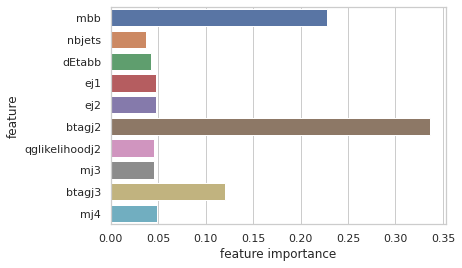

In [31]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(y="feature", x="feature importance", data=feat_imp)

In [32]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm

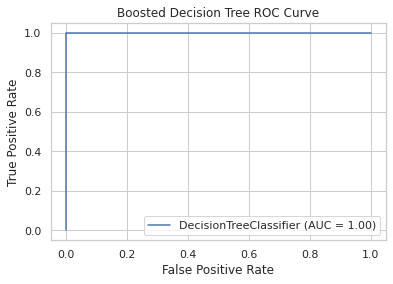

In [33]:
metrics.plot_roc_curve(clf, X_test, y_test)
plt.title("Boosted Decision Tree ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)

In [34]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import mutual_info_classif

In [35]:
feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("Feature Importance =" + str(feat_importance))

Feature Importance =[0.08677821 0.01433415 0.01612299 0.01829948 0.0179941  0.12805874
 0.01754341 0.01755159 0.04608478 0.01847648]


In [36]:
tree = clf.fit(X_test, y_test)
tree.feature_importances_

array([0.22701691, 0.03783568, 0.04294211, 0.04767263, 0.04782761,
       0.33533531, 0.04588849, 0.04631499, 0.12090509, 0.04826118])

In [37]:
feat_imp = pd.DataFrame(tree.feature_importances_, columns=['feature importance'])
feat_imp

,feature importance
0,0.227017
1,0.037836
2,0.042942
3,0.047673
4,0.047828
5,0.335335
6,0.045888
7,0.046315
8,0.120905
9,0.048261


In [38]:
feat_imp['feature']= input_columns
feat_imp

,feature importance,feature
0,0.227017,mbb
1,0.037836,nbjets
2,0.042942,dEtabb
3,0.047673,ej1
4,0.047828,ej2
5,0.335335,btagj2
6,0.045888,qglikelihoodj2
7,0.046315,mj3
8,0.120905,btagj3
9,0.048261,mj4


# Feature Importance

In [39]:
input_columns_new = ['mbb','btagj3','btagj2']

X_test = test_df[input_columns_new]

y_test = test_df['label']

In [40]:
class_1, class_0 = train_df.label.value_counts()
c1 = train_df[train_df['label']==1]
c0 = train_df[train_df['label']==0]
c1_sam = c1.sample(class_0)
undersampled_train = pd.concat([c0,c1_sam], axis=0)
undersampled_train['label'].value_counts()

0.0    96088
1.0    96088
Name: label, dtype: int64

In [41]:
undersampled_X_train_ = undersampled_train[input_columns_new]
undersampled_y_train_ = undersampled_train['label']

In [42]:
clf = clf.fit(undersampled_X_train_, undersampled_y_train_)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7893252832067721


In [45]:
feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("Feature Importance =" + str(feat_importance))

Feature Importance =[0.15150198 0.11678435 0.23171366]


In [46]:
tree = clf.fit(X_test, y_test)
tree.feature_importances_

array([0.32952512, 0.22865444, 0.44182044])

In [47]:
feat_imp = pd.DataFrame(tree.feature_importances_, columns=['feature importance'])
feat_imp

,feature importance
0,0.329525
1,0.228654
2,0.441820


In [48]:
feat_imp['feature']= input_columns_new
feat_imp

,feature importance,feature
0,0.329525,mbb
1,0.228654,btagj3
2,0.441820,btagj2


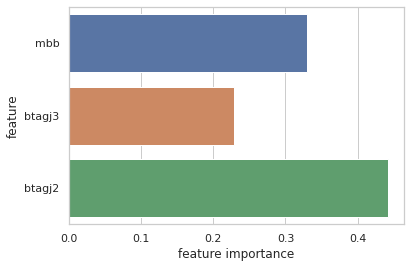

In [49]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(y="feature", x="feature importance", data=feat_imp)

# Adaboost Classification (Uninformed)

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [51]:
SEED = 1

In [52]:
X_train, X_test, y_train, y_test = train_test_split(undersampled_X_train, undersampled_y_train, test_size=0.3,
                                                   stratify=undersampled_y_train, random_state=SEED)

In [53]:
dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)

In [54]:
clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)

In [55]:
clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   n_estimators=100)

In [56]:
y_pred_proba = clf.predict_proba(X_test)[:,1]

In [57]:
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [58]:
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

In [59]:
print('ROC AUC Score: {:.10f}'.format(adb_clf_roc_auc_score))

ROC AUC Score: 0.9382255761


In [60]:
#feat_importance = clf.tree_.compute_feature_importances(normalize=False)
#print("Feature Importance =" + str(feat_importance))

In [61]:
feat_imp = pd.DataFrame(tree.feature_importances_, columns=['feature importance'])
feat_imp

,feature importance
0,0.329525
1,0.228654
2,0.441820


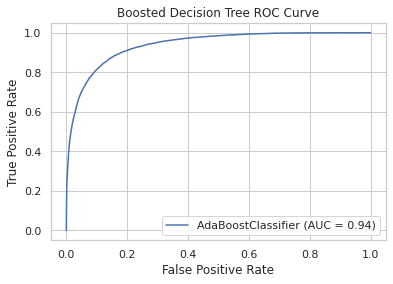

In [68]:
metrics.plot_roc_curve(clf, X_test, y_test)
plt.title("Boosted Decision Tree ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)

# Hyperparameter Tuning

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [64]:
pipe = Pipeline(steps=[('clf', clf)])

In [65]:
criterion = ['gini', 'entropy']
max_depth = [2, 4, 6, 8, 10, 12]

In [66]:
parameters = dict(clf__criterion=criterion, clf__max_depth=max_depth)

In [67]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(undersampled_X_train, undersampled_y_train)

ValueError: Invalid parameter criterion for estimator AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   n_estimators=100). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
print('Best Criterion:', clf_GS.best_estimator_.get_params(['dec_tree__criterion']))
